In [1]:
import pandas as pd
from prophet import Prophet
import plotly.express as px
import requests
import json

In [3]:
df = pd.read_excel(r"C:\Users\LEONARDO ACUÑA\Documents\6 semestre\MyS\Proyecto-Monitoreo\Backend\src\data\DESEMPLEO.xlsx")
df.head()

,Año-Mes (AAAA-MM),Tasa de ocupación (%),Tasa de desempleo (%)
0,2023-08,58.465340,9.277372
1,2023-07,58.591552,9.572851
2,2023-06,58.324317,9.342310
3,2023-05,57.168700,10.475100
4,2023-04,57.679106,10.724700


In [15]:

df['Año-Mes (AAAA-MM)'] = df['Año-Mes (AAAA-MM)'].str.replace('-', '')  # Elimina el signo menos
print(df['Año-Mes (AAAA-MM)'])
# Convierte la columna a enteros


0     202308
1     202307
2     202306
3     202305
4     202304
       ...  
63    201805
64    201804
65    201803
66    201802
67    201801
Name: Año-Mes (AAAA-MM), Length: 68, dtype: object


In [16]:
# Convierte la columna 'Año(aaaa)-Mes(mm)' a datetime
df['ds'] = pd.to_datetime(df['Año-Mes (AAAA-MM)'], format='%Y%m')

# Ajusta la columna 'ds' para que contenga el último día de cada fecha
df['ds'] = df['ds'] + pd.offsets.MonthEnd(0)
df['y'] = pd.to_numeric(df['Tasa de desempleo (%)'])
print

In [18]:
print(df['ds'][9])

2022-11-30 00:00:00


In [19]:
df.shape

(68, 6)

In [20]:
df.isnull().sum() 

Año-Mes (AAAA-MM)        0
Tasa de ocupación (%)    0
Tasa de desempleo (%)    0
Año(aaaa)-Mes(mm)        0
ds                       0
y                        0
dtype: int64

In [21]:

px.line(df, x='ds' , y='y' ,title='Desempleo 2018-2023-08')

In [22]:
#metodo de modelado 
m=Prophet()
m.fit(df)

19:11:40 - cmdstanpy - INFO - Chain [1] start processing
19:11:41 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
future=m.make_future_dataframe(periods=5, freq='M')
future.tail()

,ds
68,2023-09-30
69,2023-10-31
70,2023-11-30
71,2023-12-31
72,2024-01-31


In [24]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower', 'yhat_upper' ]]


,ds,yhat,yhat_lower,yhat_upper
0,2018-01-31,10.994778,9.007988,13.113786
1,2018-02-28,9.515354,7.507683,11.461428
2,2018-03-31,8.912175,6.795862,11.034215
3,2018-04-30,10.050595,8.142608,12.056581
4,2018-05-31,10.405750,8.428969,12.303096
...,...,...,...,...
68,2023-09-30,9.291878,7.136988,11.334052
69,2023-10-31,7.617098,5.579367,9.777572
70,2023-11-30,6.464252,4.549037,8.369361
71,2023-12-31,6.444190,4.482028,8.449517


In [25]:
# print("forecast",forecast)
#enviar a la api
url= "http://localhost:4000/prediccion"
args= forecast[['ds','yhat','yhat_lower', 'yhat_upper' ]]
data = {"datos": args.astype({'ds': 'str'}).to_dict(orient='records')}

print("Enviar:", data)

response = requests.post(url=url, json=data)

print("status res:",response.status_code)
print("respuesta servidor:", response.text)

Enviar: {'datos': [{'ds': '2018-01-31', 'yhat': 10.99477772796509, 'yhat_lower': 9.007987627688491, 'yhat_upper': 13.11378555371847}, {'ds': '2018-02-28', 'yhat': 9.515354428713524, 'yhat_lower': 7.507682864659723, 'yhat_upper': 11.461427696603273}, {'ds': '2018-03-31', 'yhat': 8.91217484655374, 'yhat_lower': 6.795861752050151, 'yhat_upper': 11.034214878308335}, {'ds': '2018-04-30', 'yhat': 10.050595294509048, 'yhat_lower': 8.142607927222944, 'yhat_upper': 12.056580749736213}, {'ds': '2018-05-31', 'yhat': 10.405749534470209, 'yhat_lower': 8.428968522059979, 'yhat_upper': 12.303095534839708}, {'ds': '2018-06-30', 'yhat': 9.88053613877139, 'yhat_lower': 7.984524046600052, 'yhat_upper': 11.988007131066603}, {'ds': '2018-07-31', 'yhat': 10.335943500716638, 'yhat_lower': 8.302148362307628, 'yhat_upper': 12.318917097109436}, {'ds': '2018-08-31', 'yhat': 9.879234179079987, 'yhat_lower': 7.842131827841034, 'yhat_upper': 11.851521844780283}, {'ds': '2018-09-30', 'yhat': 9.801248876684273, 'yhat

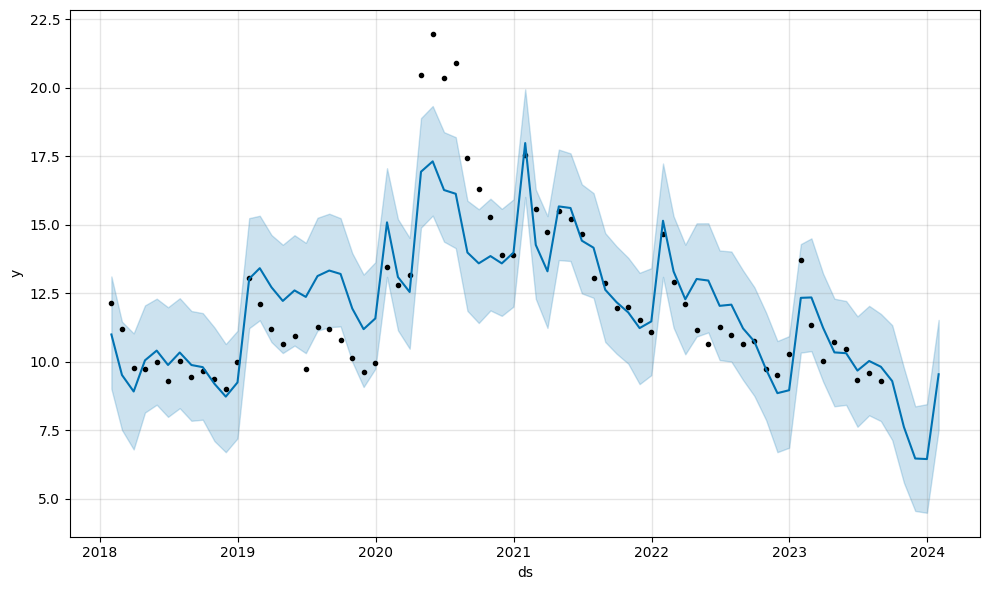

In [26]:
fig1=m.plot(forecast)